### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO2, A2C
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 3
max_inventory_amount_regional_warehouses = 40
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = [1,2,1]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 5

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 13 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 13 ; Demand: 2 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 13 ; Demand: 1 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: MultiDiscrete([41 41 41])
Action space: MultiDiscrete([2 2 2])
Starting state: [13 13 13]
________________________________________________________________________________


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO2(MlpPolicy, env, verbose=1)
ppo_model.learn(total_timesteps=10000)

Wrapping the env in a DummyVecEnv.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



--------------------------------------
| approxkl           | 2.8362076e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.27         |
| fps                | 227           |
| n_updates          | 1             |
| policy_entropy     | 2.0794168     |
| policy_loss        | -0.0038155613 |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 0.099219784   |
--------------------------------------
--------------------------------------
| approxkl           | 9.477811e-06  |
| clipfrac           | 0.0           |
| explained_variance | -1.1          |
| fps                | 1029          |
| n_updates          | 2 

--------------------------------------
| approxkl           | 3.9229253e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.67          |
| fps                | 1279          |
| n_updates          | 10            |
| policy_entropy     | 2.0767074     |
| policy_loss        | -0.0031338732 |
| serial_timesteps   | 1280          |
| time_elapsed       | 1.62          |
| total_timesteps    | 1280          |
| value_loss         | 0.020842327   |
--------------------------------------
--------------------------------------
| approxkl           | 4.2858817e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.603         |
| fps                | 1363          |
| n_updates          | 11            |
| policy_entropy     | 2.0768478     |
| policy_loss        | -0.0032760133 |
| serial_timesteps   | 1408          |
| time_elapsed       | 1.72          |
| total_timesteps    | 1408          |
| value_loss         | 0.046108965   |
-------------------------

-------------------------------------
| approxkl           | 0.0004902093 |
| clipfrac           | 0.001953125  |
| explained_variance | 0.71         |
| fps                | 1347         |
| n_updates          | 27           |
| policy_entropy     | 2.0127966    |
| policy_loss        | -0.008740884 |
| serial_timesteps   | 3456         |
| time_elapsed       | 3.27         |
| total_timesteps    | 3456         |
| value_loss         | 0.035222385  |
-------------------------------------
-------------------------------------
| approxkl           | 0.0008258891 |
| clipfrac           | 0.0          |
| explained_variance | 0.563        |
| fps                | 1367         |
| n_updates          | 28           |
| policy_entropy     | 1.9952314    |
| policy_loss        | -0.011084468 |
| serial_timesteps   | 3584         |
| time_elapsed       | 3.36         |
| total_timesteps    | 3584         |
| value_loss         | 0.061500184  |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00075391046 |
| clipfrac           | 0.0           |
| explained_variance | 0.67          |
| fps                | 1276          |
| n_updates          | 44            |
| policy_entropy     | 1.8227811     |
| policy_loss        | -0.009539088  |
| serial_timesteps   | 5632          |
| time_elapsed       | 4.92          |
| total_timesteps    | 5632          |
| value_loss         | 0.069833055   |
--------------------------------------
--------------------------------------
| approxkl           | 0.00032219646 |
| clipfrac           | 0.0           |
| explained_variance | 0.539         |
| fps                | 1319          |
| n_updates          | 45            |
| policy_entropy     | 1.7838327     |
| policy_loss        | -0.005333825  |
| serial_timesteps   | 5760          |
| time_elapsed       | 5.02          |
| total_timesteps    | 5760          |
| value_loss         | 0.20151892    |
-------------------------

--------------------------------------
| approxkl           | 0.00016532444 |
| clipfrac           | 0.0           |
| explained_variance | 0.299         |
| fps                | 1264          |
| n_updates          | 61            |
| policy_entropy     | 1.6273441     |
| policy_loss        | -0.0036969993 |
| serial_timesteps   | 7808          |
| time_elapsed       | 6.55          |
| total_timesteps    | 7808          |
| value_loss         | 0.20542546    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00024457404 |
| clipfrac           | 0.0           |
| explained_variance | 0.535         |
| fps                | 1520          |
| n_updates          | 62            |
| policy_entropy     | 1.6722214     |
| policy_loss        | -0.0048877224 |
| serial_timesteps   | 7936          |
| time_elapsed       | 6.67          |
| total_timesteps    | 7936          |
| value_loss         | 0.14043066    |
-------------------------

--------------------------------------
| approxkl           | 0.00041912423 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.329         |
| fps                | 1034          |
| n_updates          | 78            |
| policy_entropy     | 1.6040956     |
| policy_loss        | -0.006752744  |
| serial_timesteps   | 9984          |
| time_elapsed       | 8.49          |
| total_timesteps    | 9984          |
| value_loss         | 0.2289955     |
--------------------------------------


###### Learning Curve

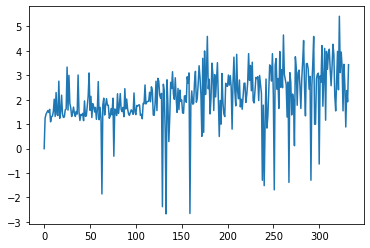

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["Inventory:"]:
        inventory_levels[i].append(inv)
        i += 1
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | Inventory: [12 11 12] | Action: [0 1 0] | Reward: 0.08 | 
Steps left: 28 | Inventory: [11  9 11] | Action: [0 0 1] | Reward: 0.09 | 
Steps left: 27 | Inventory: [10 12 10] | Action: [0 1 0] | Reward: 0.09 | 
Steps left: 26 | Inventory: [ 9 10 14] | Action: [0 1 0] | Reward: 0.09 | 
Steps left: 25 | Inventory: [ 8 13 13] | Action: [0 0 0] | Reward: 0.08 | 
Steps left: 24 | Inventory: [ 7 16 12] | Action: [1 0 1] | Reward: 0.09 | 
Steps left: 23 | Inventory: [ 6 14 11] | Action: [1 0 0] | Reward: 0.1 | 
Steps left: 22 | Inventory: [10 12 15] | Action: [0 0 1] | Reward: 0.08 | 
Steps left: 21 | Inventory: [14 10 14] | Action: [1 0 0] | Reward: 0.07 | 
Steps left: 20 | Inventory: [13  8 18] | Action: [1 1 0] | Reward: 0.08 | 
Steps left: 19 | Inventory: [17  6 17] | Action: [0 0 0] | Reward: 0.08 | 
Steps left: 18 | Inventory: [21  9 16] | Action: [0 0 0] | Reward: 0.07 | 
Steps left: 17 | Inventory: [20  7 15] | Action: [1 0 0] | Reward: 0.08 | 
Steps left: 16 | Inventory

###### Inventory level graph

Regional warehouse 1


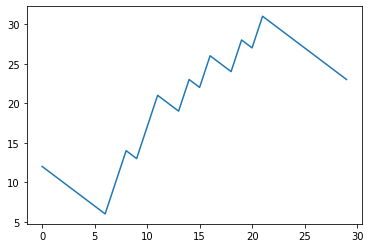

Regional warehouse 2


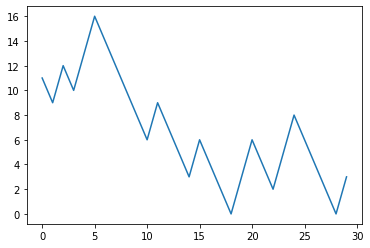

Regional warehouse 3


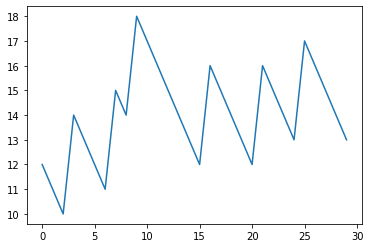

In [8]:
for rw_id in inventory_levels:
    print("Regional warehouse", rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.show()